In [ ]:
%pip install tensorflow tensorflow-gpu opencv-python matplotlib numpy 

In [ ]:
import tensorflow as tf, numpy as np, matplotlib.pyplot as plt, os, cv2, keras, time, sklearn, glob

from tensorflow import keras
from keras.utils import np_utils

### Pre-processing

In [2]:
ucl_images = []
final_array = []
res_array = []

data_directory = '../../Dependencies/malaria/malaria-ucl/test/'
file_extenstion = '.jpg'

for file in os.listdir(data_directory):
    if file.endswith(file_extenstion): ucl_images.append(file)

for file in ucl_images[:10]:
    try:
        file_path = data_directory + file
        image = cv2.imread(file_path, cv2.IMREAD_COLOR)
        print(image.shape)
        img2 = image.reshape((-1, 3))
        print(img2.shape)
        img2 = np.float32(img2)
        criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
        
        ret, label, center = cv2.kmeans(img2, 4, None, criteria, 10, cv2.KMEANS_PP_CENTERS) # KMEANS_PP_CENTERS, KMEANS_RANDOM_CENTERS

        center_uint8 = np.uint8(center)
        res = center_uint8[label.flatten()]
        result_image = res.reshape((image.shape))

        cv2.imshow('image', result_image)
        cv2.waitKey(0)
        
        # Color Quantization
        
        # ret = sum of squared distance from each point to their corresponding center
        # label = label of each pixel
        # center = array of centers of each cluster
        break
    except:
        print('Error: ' + file)


Error: 023.jpg
Error: 065.jpg
Error: 025.jpg
Error: 012.jpg
Error: 028.jpg
Error: 050.jpg
Error: 016.jpg
Error: 081.jpg


In [26]:
#print(center)
print(res, '\n\n', center, '\n\n', label, '\n ', ret)


[[240 230 223]
 [240 230 223]
 [240 230 223]
 ...
 [240 230 223]
 [237 206 195]
 [237 206 195]] 

 [[177.0129  147.57213 155.54106]
 [237.99477 206.61528 195.57724]
 [240.14229 230.85405 223.72075]
 [152.45934 126.52981 136.01907]] 

 [[2]
 [2]
 [2]
 ...
 [2]
 [1]
 [1]] 
  337025497.90932757


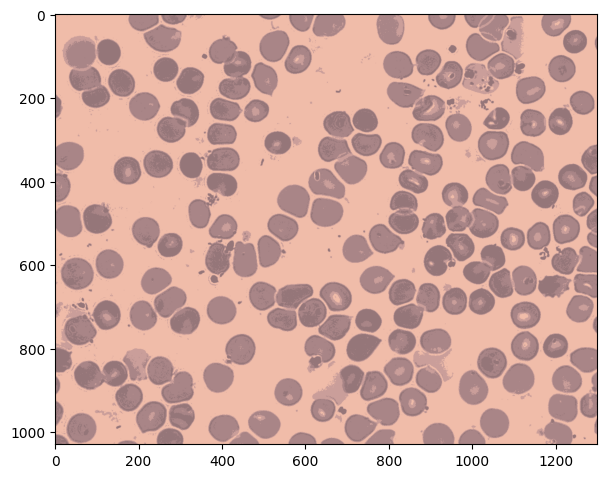

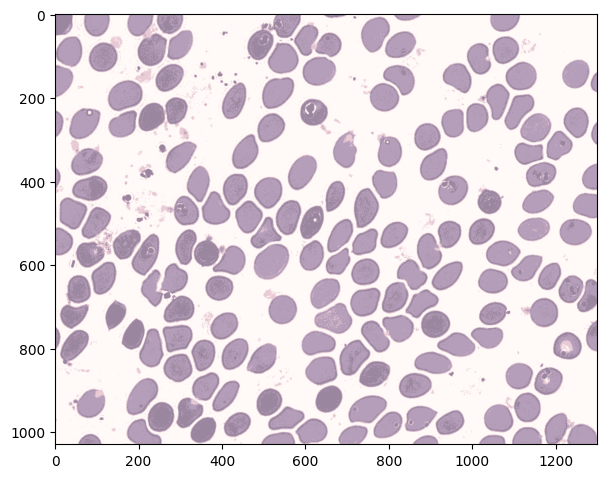

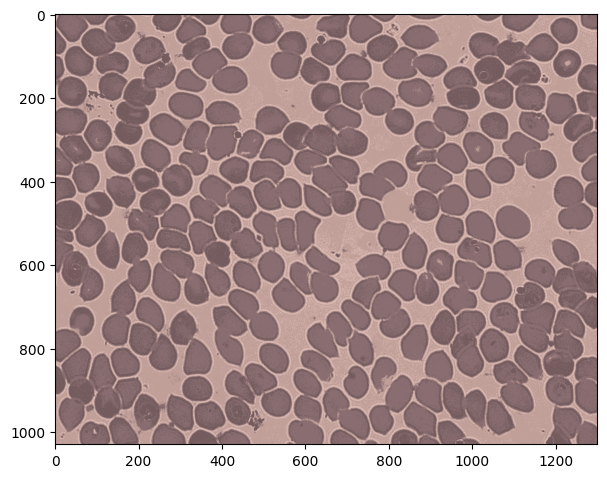

In [16]:
plt.figure(figsize=(7,7))
plt.imshow(res_array[3])
plt.figure(figsize=(7,7))
plt.imshow(res_array[5])
plt.figure(figsize=(7,7))
plt.imshow(res_array[7])


In [ ]:
# image_HSV = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
        # image_threshold = cv2.inRange(image_HSV, (20, 20, 20), (200, 200, 200)) / 255.0
        # cv2.imshow('image', image_threshold)
        # image_threshold = cv2.resize(image_threshold, (64, 64))
        # image = np.asarray(image_threshold)
        # final_array += [image]
        
# print(len(final_array)), print(final_array[0].mean()), print(final_array[0].shape), print(final_array[0])

In [ ]:
# K-means Clustering from main program

# image = cv2.imread(im)
# print(image.shape)
# print(image.dtype) 
# image = image.reshape((-1, 3))
# print(image.shape)
# print(image.dtype)
# image = np.float32(image)


# number_of_clusters = 3
# criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

# _, labels, center = cv2.kmeans(image, number_of_clusters, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS) # KMEANS_PP_CENTERS, KMEANS_RANDOM_CENTERS

# center_uint8 = np.uint8(center)
# res = center_uint8[labels.flatten()]
# result_image = res.reshape((image.shape))

# cluster_centres = np.uint8(center)
# roi_indeces = np.argmax(cluster_centres, axis=0)
    
# rois = []
# for i in range(number_of_clusters):
#     indices = np.where(labels == i)[0]
#     roi = image.reshape((-1, 3))[indices]
#     rois.append(roi)

# _, binary_image = cv2.threshold(cluster_centres, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# for contour in contours:
#     x, y, w, h = cv2.boundingRect(contour)
#     cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    